In [1]:
#This is KMeans demo on iris dataset without prebuilt sklearn function

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets #to get dataset

In [3]:
#randomly selecting k-points from our data, where k is number of clusters
def initialize_centroids(points, k):
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

In [4]:
def closest_centroid(points, centroids):
    #return array with index of data to nearest centroid
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

In [5]:
def move_centroids(points, closest, centroids):
    #returns new centroids
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

In [6]:
def own_kmeans(data, k):
    c = initialize_centroids(data, k)
    #We will run maximum 500 iterations or till centroids don't change. We can change this no.
    for i in range(0, 500):
        new_centroids = move_centroids(data, closest_centroid(data, c), c)
        if np.array_equal(new_centroids,c):
            return new_centroids, closest_centroid(data, c), i
        else:
            c = new_centroids

In [7]:
iris = datasets.load_iris()
iris_data = iris.data

In [9]:
centroids, target, iterations = own_kmeans(iris_data, 3) #we are asking algorithm for 3 clusters

In [10]:
centroids #centroids of our 3 clusters

array([[ 5.9016129 ,  2.7483871 ,  4.39354839,  1.43387097],
       [ 5.006     ,  3.418     ,  1.464     ,  0.244     ],
       [ 6.85      ,  3.07368421,  5.74210526,  2.07105263]])

In [11]:
target #Array which tells us which point belongs to which cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int64)

In [12]:
iterations #Our algorithm did K-means in 6 iterations

6

In [13]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [14]:
#As we can see, our K-Means is performing pretty good. Let's check accuracy percentage

In [14]:
#For convinience, we will make our target also look like this

In [15]:
target[target == 2] = 4
target[target == 1] = 5
target[target == 0] = 6

In [17]:
target[target == 5] = 0
target[target == 6] = 1
target[target == 4] = 2

In [18]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int64)

In [19]:
#now our target looks like iris.target
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [24]:
variation = (iris.target != target).sum()/float(iris.target.size)*100

In [25]:
variation

10.666666666666668

In [26]:
#So, only 10% variation is present. Our algorithm is clustering 90% accurately

In [27]:
#Also, this is unsupervised Machine learning, so we don't have answers. But this is pretty good.

In [28]:
%matplotlib inline

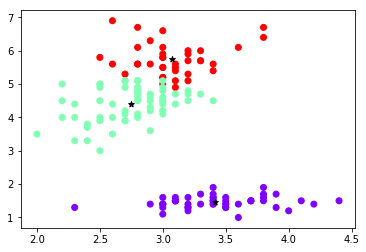

In [36]:
plt.scatter(iris_data[:,1], iris_data[:,2], c=target,cmap='rainbow')
plt.scatter(centroids[:,1], centroids[:,2], color="black", marker='*')

In [35]:
#The clustering looks pretty good and we can see the black ones are the centroids

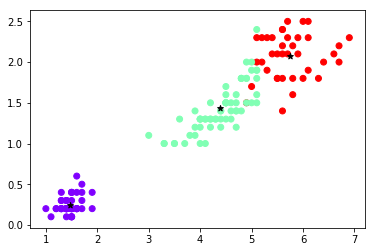

In [38]:
plt.scatter(iris_data[:,2], iris_data[:,3], c=target,cmap='rainbow')
plt.scatter(centroids[:,2], centroids[:,3], color="black", marker='*')

In [39]:
#Looking at it from different dimensions, our plot looks pretty good.
#centroids look right in place.